### EDA + Feature Engineering Work in Progress

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline

# import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import KMeans
from sklearn import metrics 
from scipy.spatial.distance import cdist

from yellowbrick.cluster import SilhouetteVisualizer
from yellowbrick.cluster import InterclusterDistance

In [2]:
data = pd.read_csv('/Users/jennihawk/Documents/Data Science3/Clustering Project/Online_Retail.csv', encoding='latin1', parse_dates=["InvoiceDate"]) 

In [3]:
data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [4]:
data.shape

(541909, 8)

In [5]:
# Turn customer ID into string
data['CustomerID'] = data['CustomerID'].astype(str)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   541909 non-null  object        
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 33.1+ MB


### Date EDA 
- year, month, day as separate columns

In [7]:
data['Year'] = data['InvoiceDate'].dt.year
data['Month'] = data['InvoiceDate'].dt.month
data['Day']= data['InvoiceDate'].dt.day
#data['is_leap_year'] = data['InvoiceDate'].dt.is_leap_year

In [8]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Year,Month,Day
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010,12,1
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,1
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010,12,1
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,1
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,1


#### Don't have two full years of data
- 2010 December and 2011 all months
- Only month we have yoy data is December

In [9]:
data.groupby(['Year', 'Month']).size()

Year  Month
2010  12       42481
2011  1        35147
      2        27707
      3        36748
      4        29916
      5        37030
      6        36874
      7        39518
      8        35284
      9        50226
      10       60742
      11       84711
      12       25525
dtype: int64

#### For month of December, by year, are all days accounted for?
- 2011 data only covers 9 days in December
- 2010 no data after the 23rd in December
- 2011: May want to drop the nine days of data that would leave you with 11 complete months of data

In [10]:
# these are the actual counts of rows of original data for these days for December 'Month'== 12 
# that's what .size() does - gives us the count
# take all data, take just rows where month is 12 and then group it by year and day
data[data.Month==12].groupby(['Year', 'Day']).size()

Year  Day
2010  1      3108
      2      2109
      3      2202
      5      2725
      6      3878
      7      2963
      8      2647
      9      2891
      10     2758
      12     1451
      13     2283
      14     2087
      15     1349
      16     1790
      17     3115
      19      522
      20     1763
      21     1586
      22      291
      23      963
2011  1      2901
      2      2880
      4      2038
      5      5331
      6      3365
      7      2438
      8      4940
      9      1632
dtype: int64

In [11]:
#data.Year.unique()

In [12]:
#data.Month.unique()

#### Review Unique Values by Column

In [13]:
data.Country.unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Austria',
       'Israel', 'Finland', 'Bahrain', 'Greece', 'Hong Kong', 'Singapore',
       'Lebanon', 'United Arab Emirates', 'Saudi Arabia',
       'Czech Republic', 'Canada', 'Unspecified', 'Brazil', 'USA',
       'European Community', 'Malta', 'RSA'], dtype=object)

In [14]:
#data.Country.value_counts()

In [15]:
data.Country.nunique()

38

In [16]:
data.InvoiceNo.nunique()

25900

In [17]:
data.Description.nunique()

4223

In [18]:
data.StockCode.nunique()

4070

In [19]:
data.CustomerID.nunique()

4373

#### Review Customer ID Nulls 

In [20]:
check_null = data[data['CustomerID'].isnull()]

In [21]:
check_null

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Year,Month,Day


#### What countries the nulls come from

In [22]:
# see what countries the nulls come from
check_null.Country.value_counts()

Series([], Name: Country, dtype: int64)

#### Drop Nulls

In [23]:
data_clean = data.dropna()

In [24]:
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 540455 entries, 0 to 541908
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    540455 non-null  object        
 1   StockCode    540455 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     540455 non-null  int64         
 4   InvoiceDate  540455 non-null  datetime64[ns]
 5   UnitPrice    540455 non-null  float64       
 6   CustomerID   540455 non-null  object        
 7   Country      540455 non-null  object        
 8   Year         540455 non-null  int64         
 9   Month        540455 non-null  int64         
 10  Day          540455 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(4), object(5)
memory usage: 49.5+ MB


#### Check for negative values in Quantity column and Unit Price column

In [25]:
# mask
filt1 = data_clean['Quantity'] < 0
# pass mask to dataframe. Selects only true rows.
data_clean[filt1]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Year,Month,Day
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom,2010,12,1
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom,2010,12,1
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom,2010,12,1
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,2010,12,1
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,2010,12,1
...,...,...,...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom,2011,12,9
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom,2011,12,9
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom,2011,12,9
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom,2011,12,9


#### For this project, assume negative values should be positive values. Turn negative vals into positive vals.

In [26]:
data_clean['Quantity'] = data_clean['Quantity'].abs()

/var/folders/_0/21d2kw097h912yp8tr3nkrsm0000gn/T/ipykernel_87867/1238295681.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean['Quantity'] = data_clean['Quantity'].abs()


In [27]:
#data_clean[filt1]

In [28]:
data_clean.shape

(540455, 11)

#### Get total sales per invoice line item

In [29]:
data_clean['Sales'] = data_clean['Quantity'] * data_clean['UnitPrice']

/var/folders/_0/21d2kw097h912yp8tr3nkrsm0000gn/T/ipykernel_87867/1027470476.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean['Sales'] = data_clean['Quantity'] * data_clean['UnitPrice']


#### Review total Sales by year

In [30]:
data_clean.groupby(data_clean.InvoiceDate.dt.year)['Sales'].sum()

InvoiceDate
2010    8.985353e+05
2011    1.064284e+07
Name: Sales, dtype: float64

### Create Business Buyer vs Retail Buyer: Look at distribution of quantity by line item on invoice. 

In [31]:
data_clean

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Year,Month,Day,Sales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010,12,1,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,1,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010,12,1,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,1,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,1,20.34
...,...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,2011,12,9,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,2011,12,9,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,2011,12,9,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,2011,12,9,16.60


In [32]:
#data_clean.describe()

### Create UK data only dataframe

In [33]:
filt = data_clean['Country'] == 'United Kingdom'

In [34]:
data_clean2 = data_clean[filt]
data_clean2

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Year,Month,Day,Sales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010,12,1,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,1,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010,12,1,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,1,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,1,20.34
...,...,...,...,...,...,...,...,...,...,...,...,...
541889,581585,22466,FAIRY TALE COTTAGE NIGHT LIGHT,12,2011-12-09 12:31:00,1.95,15804.0,United Kingdom,2011,12,9,23.40
541890,581586,22061,LARGE CAKE STAND HANGING STRAWBERY,8,2011-12-09 12:49:00,2.95,13113.0,United Kingdom,2011,12,9,23.60
541891,581586,23275,SET OF 3 HANGING OWLS OLLIE BEAK,24,2011-12-09 12:49:00,1.25,13113.0,United Kingdom,2011,12,9,30.00
541892,581586,21217,RED RETROSPOT ROUND CAKE TINS,24,2011-12-09 12:49:00,8.95,13113.0,United Kingdom,2011,12,9,214.80


#### Column to assign quantity high or low

In [35]:
data_clean2['Quantity_Type'] = np.where(data_clean2['Quantity'] > 10, 'high', 'low')

/var/folders/_0/21d2kw097h912yp8tr3nkrsm0000gn/T/ipykernel_87867/656606254.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean2['Quantity_Type'] = np.where(data_clean2['Quantity'] > 10, 'high', 'low')


In [36]:
data_clean2

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Year,Month,Day,Sales,Quantity_Type
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010,12,1,15.30,low
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,1,20.34,low
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010,12,1,22.00,low
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,1,20.34,low
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,1,20.34,low
...,...,...,...,...,...,...,...,...,...,...,...,...,...
541889,581585,22466,FAIRY TALE COTTAGE NIGHT LIGHT,12,2011-12-09 12:31:00,1.95,15804.0,United Kingdom,2011,12,9,23.40,high
541890,581586,22061,LARGE CAKE STAND HANGING STRAWBERY,8,2011-12-09 12:49:00,2.95,13113.0,United Kingdom,2011,12,9,23.60,low
541891,581586,23275,SET OF 3 HANGING OWLS OLLIE BEAK,24,2011-12-09 12:49:00,1.25,13113.0,United Kingdom,2011,12,9,30.00,high
541892,581586,21217,RED RETROSPOT ROUND CAKE TINS,24,2011-12-09 12:49:00,8.95,13113.0,United Kingdom,2011,12,9,214.80,high


#### Dataframes that tells you how many high values and low values you have

In [37]:
#counting per customer ID how many rows of highs there are
high_df = data_clean2[data_clean2.Quantity_Type=='high'].groupby(['CustomerID','Quantity_Type']).size().reset_index(name = 'High_Qty_Count')

In [38]:
high_df

,CustomerID,Quantity_Type,High_Qty_Count
0,12346.0,high,2
1,12747.0,high,50
2,12748.0,high,549
3,12749.0,high,53
4,12820.0,high,34
...,...,...,...
3715,18281.0,high,3
3716,18282.0,high,2
3717,18283.0,high,6
3718,18287.0,high,60


In [39]:
#counting per customer ID how many rows of lows there are
low_df = data_clean2[data_clean2.Quantity_Type=='low'].groupby(['CustomerID','Quantity_Type']).size().reset_index(name='Low_Qty_Count')

In [40]:
low_df

,CustomerID,Quantity_Type,Low_Qty_Count
0,12747.0,low,53
1,12748.0,low,4093
2,12749.0,low,178
3,12820.0,low,25
4,12821.0,low,2
...,...,...,...
3747,18281.0,low,4
3748,18282.0,low,11
3749,18283.0,low,750
3750,18287.0,low,10


### Business + Retail Buyer Feature Creation
- https://www.statology.org/pandas-groupby-nlargest/
- Business: display two largest values by group:
df.groupby('group_var')['values_var'].nlargest(2)

#### Path 1: .nlargest  Not successful
- Creates series, complexity of doing operations on this structure - tried to make it work by creating df but still complicated. 

In [42]:
# df_largest = data_clean2.groupby('CustomerID')['Quantity'].nlargest(2)
# df_largest.head()
# #output shows two largest points values for each team, along with their index positions in the original DataFrame.

#### Path 2: .max straightforward groupby
- get max qty number ordered on a line item by customer

In [43]:
biz_retail = data_clean2.groupby('CustomerID')[['Quantity']].max().reset_index()

In [44]:
biz_retail

,CustomerID,Quantity
0,12346.0,74215
1,12747.0,48
2,12748.0,576
3,12749.0,75
4,12820.0,48
...,...,...
3946,18281.0,12
3947,18282.0,48
3948,18283.0,13
3949,18287.0,60


#### Assign conditions to create Business + Retail Segment
- https://datatofish.com/if-condition-in-pandas-dataframe/

- Fix ambiguous error
https://www.learndatasci.com/solutions/python-valueerror-truth-value-series-ambiguous-use-empty-bool-item-any-or-all/


In [45]:
biz_retail['Business_Buyer'] = biz_retail['Quantity'].apply(lambda x: 'True' if x > 10 else 'False')

In [46]:
biz_retail['Retail_Buyer'] = biz_retail['Quantity'].apply(lambda x: 'True' if x < 10 else 'False')

In [47]:
biz_retail

,CustomerID,Quantity,Business_Buyer,Retail_Buyer
0,12346.0,74215,True,False
1,12747.0,48,True,False
2,12748.0,576,True,False
3,12749.0,75,True,False
4,12820.0,48,True,False
...,...,...,...,...
3946,18281.0,12,True,False
3947,18282.0,48,True,False
3948,18283.0,13,True,False
3949,18287.0,60,True,False


#### Customer spending year over year:
- column year spend 2010 and column year spend 2011
- third column is difference - do it as actual and year over year percentage

#### 2010 Annual Spend Feature

In [48]:
data_clean_2010 = data_clean2[data_clean2.Year != 2011]

In [49]:
#data_clean_2010.head()

In [50]:
spend_2010 = data_clean_2010.groupby(['CustomerID']).agg(Spend_2010 = ('Sales', 'sum')).reset_index()

In [51]:
spend_2010

,CustomerID,Spend_2010
0,12747.0,706.27
1,12748.0,4278.58
2,12826.0,155.00
3,12829.0,85.75
4,12838.0,390.79
...,...,...
867,18256.0,50.10
868,18259.0,376.30
869,18260.0,230.70
870,18269.0,198.30


#### 2011 Annual Spend Feature

In [52]:
data_clean_2011 = data_clean2[data_clean2.Year != 2010]

In [53]:
spend_2011 = data_clean_2011.groupby(['CustomerID']).agg(Spend_2011 = ('Sales', 'sum')).reset_index()

In [54]:
spend_2011

,CustomerID,Spend_2011
0,12346.0,154367.20
1,12747.0,3489.74
2,12748.0,34088.78
3,12749.0,4313.56
4,12820.0,942.34
...,...,...
3831,18281.0,80.82
3832,18282.0,179.50
3833,18283.0,2094.88
3834,18287.0,1837.28


#### Yearly Spending Dataframe
- Includes year over year actual difference and percentage difference

In [55]:
yrly_spend_df = pd.merge(spend_2010, spend_2011, on='CustomerID', how='outer')

In [56]:
yrly_spend_df

,CustomerID,Spend_2010,Spend_2011
0,12747.0,706.27,3489.74
1,12748.0,4278.58,34088.78
2,12826.0,155.00,1326.32
3,12829.0,85.75,247.20
4,12838.0,390.79,292.34
...,...,...,...
3946,18280.0,NaN,180.60
3947,18281.0,NaN,80.82
3948,18282.0,NaN,179.50
3949,18283.0,NaN,2094.88


In [57]:
yrly_spend_df[['Spend_2010','Spend_2011']] = yrly_spend_df[['Spend_2010','Spend_2011']].fillna(0)

In [58]:
yrly_spend_df['YOY_Actual'] = yrly_spend_df['Spend_2011'] - yrly_spend_df['Spend_2010']

In [59]:
yrly_spend_df.head()

,CustomerID,Spend_2010,Spend_2011,YOY_Actual
0,12747.0,706.27,3489.74,2783.47
1,12748.0,4278.58,34088.78,29810.20
2,12826.0,155.00,1326.32,1171.32
3,12829.0,85.75,247.20,161.45
4,12838.0,390.79,292.34,-98.45


In [60]:
#percentage via custom function
def custom_calc(x):
    return (((x[1] - x[0]) / x[0]) * 100).round(2)

yrly_spend_df['Percent_Diff'] = yrly_spend_df[['Spend_2010', 'Spend_2011']].apply(custom_calc, axis=1)

/var/folders/_0/21d2kw097h912yp8tr3nkrsm0000gn/T/ipykernel_87867/1130764934.py:3: RuntimeWarning: divide by zero encountered in double_scalars
  return (((x[1] - x[0]) / x[0]) * 100).round(2)
/var/folders/_0/21d2kw097h912yp8tr3nkrsm0000gn/T/ipykernel_87867/1130764934.py:3: RuntimeWarning: invalid value encountered in double_scalars
  return (((x[1] - x[0]) / x[0]) * 100).round(2)


#### Fix custom_calc function 
- When YoY Actual is divided by zero from Spend_2010 it's a math error returned as infiniti in pandas column

In [61]:
# The math throws an error when you divide 180 by 0
yrly_spend_df

,CustomerID,Spend_2010,Spend_2011,YOY_Actual,Percent_Diff
0,12747.0,706.27,3489.74,2783.47,394.11
1,12748.0,4278.58,34088.78,29810.20,696.73
2,12826.0,155.00,1326.32,1171.32,755.69
3,12829.0,85.75,247.20,161.45,188.28
4,12838.0,390.79,292.34,-98.45,-25.19
...,...,...,...,...,...
3946,18280.0,0.00,180.60,180.60,inf
3947,18281.0,0.00,80.82,80.82,inf
3948,18282.0,0.00,179.50,179.50,inf
3949,18283.0,0.00,2094.88,2094.88,inf


### Create Customer Dataframe for use in algorithm
- Finding: 97% of customer IDs made purchases in 2011 but not in 2010.
- Focus on 2011 spend because Looks like most customers onboaded in 2011

In [62]:
customer_df = pd.merge(biz_retail, yrly_spend_df, on='CustomerID')

In [63]:
customer_df.rename(columns={"Quantity": "Max_Quantity"},inplace=True)

In [64]:
customer_df.head(20)

,CustomerID,Max_Quantity,Business_Buyer,Retail_Buyer,Spend_2010,Spend_2011,YOY_Actual,Percent_Diff
0,12346.0,74215,True,False,0.00,154367.20,154367.20,inf
1,12747.0,48,True,False,706.27,3489.74,2783.47,394.11
2,12748.0,576,True,False,4278.58,34088.78,29810.20,696.73
3,12749.0,75,True,False,0.00,4313.56,4313.56,inf
4,12820.0,48,True,False,0.00,942.34,942.34,inf
5,12821.0,24,True,False,0.00,92.72,92.72,inf
6,12822.0,48,True,False,0.00,978.78,978.78,inf
7,12823.0,70,True,False,0.00,1759.50,1759.50,inf
8,12824.0,16,True,False,0.00,397.12,397.12,inf
9,12826.0,48,True,False,155.00,1326.32,1171.32,755.69


In [65]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3951 entries, 0 to 3950
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   CustomerID      3951 non-null   object 
 1   Max_Quantity    3951 non-null   int64  
 2   Business_Buyer  3951 non-null   object 
 3   Retail_Buyer    3951 non-null   object 
 4   Spend_2010      3951 non-null   float64
 5   Spend_2011      3951 non-null   float64
 6   YOY_Actual      3951 non-null   float64
 7   Percent_Diff    3950 non-null   float64
dtypes: float64(4), int64(1), object(3)
memory usage: 277.8+ KB


In [66]:
# Business Buyers = True
customer_df.Business_Buyer.value_counts()

True     3720
False     231
Name: Business_Buyer, dtype: int64

In [67]:
# Retail Buyers = True
customer_df.Retail_Buyer.value_counts()

False    3761
True      190
Name: Retail_Buyer, dtype: int64

### Understanding Business Customers based on the quantity they order: low, mid, high, outlier
Ways to roll up to qty but break out in different ways to understand behavior

#### Take current customer dataframe and add onto it just custmer ID and high qty count from high_df
- High_Qty_Count = number of rows per customer that ordered a high quantity per that line item
- Low_Qty_Count = number of rows per customer that ordered a high quantity per that line item
- Qty Count is at line item level of invoice. Example: customer 12747 has 103 individual line items, of those 50 are high 53 are low.

In [68]:
customer_df = pd.merge(customer_df, high_df[['CustomerID', 'High_Qty_Count']], on='CustomerID')
customer_df = pd.merge(customer_df, low_df[['CustomerID', 'Low_Qty_Count']], on='CustomerID')

In [69]:
customer_df

,CustomerID,Max_Quantity,Business_Buyer,Retail_Buyer,Spend_2010,Spend_2011,YOY_Actual,Percent_Diff,High_Qty_Count,Low_Qty_Count
0,12747.0,48,True,False,706.27,3489.74,2783.47,394.11,50,53
1,12748.0,576,True,False,4278.58,34088.78,29810.20,696.73,549,4093
2,12749.0,75,True,False,0.00,4313.56,4313.56,inf,53,178
3,12820.0,48,True,False,0.00,942.34,942.34,inf,34,25
4,12821.0,24,True,False,0.00,92.72,92.72,inf,4,2
...,...,...,...,...,...,...,...,...,...,...
3516,18281.0,12,True,False,0.00,80.82,80.82,inf,3,4
3517,18282.0,48,True,False,0.00,179.50,179.50,inf,2,11
3518,18283.0,13,True,False,0.00,2094.88,2094.88,inf,6,750
3519,18287.0,60,True,False,0.00,1837.28,1837.28,inf,60,10


#### Create column of total line item qty by customer. Two ways to do this:
- data_clean2 grouby customer ID.size  OR  total item lines = high qty count + low qty count
- Then create new column called high qty percentage. High qty count over total quantity 
- New column Low qty percentage = 1-high quantity percentage

In [79]:
customer_df['invoice_lines_count'] = customer_df.High_Qty_Count + customer_df.Low_Qty_Count
customer_df

,CustomerID,Max_Quantity,Business_Buyer,Retail_Buyer,Spend_2010,Spend_2011,YOY_Actual,Percent_Diff,High_Qty_Count,Low_Qty_Count,invoice_lines_count
0,12747.0,48,True,False,706.27,3489.74,2783.47,394.11,50,53,103
1,12748.0,576,True,False,4278.58,34088.78,29810.20,696.73,549,4093,4642
2,12749.0,75,True,False,0.00,4313.56,4313.56,inf,53,178,231
3,12820.0,48,True,False,0.00,942.34,942.34,inf,34,25,59
4,12821.0,24,True,False,0.00,92.72,92.72,inf,4,2,6
...,...,...,...,...,...,...,...,...,...,...,...
3516,18281.0,12,True,False,0.00,80.82,80.82,inf,3,4,7
3517,18282.0,48,True,False,0.00,179.50,179.50,inf,2,11,13
3518,18283.0,13,True,False,0.00,2094.88,2094.88,inf,6,750,756
3519,18287.0,60,True,False,0.00,1837.28,1837.28,inf,60,10,70


#### Create high + low qty percent columns
- Remember these are percent of line item rows that have been designated as high qty or low qty line item orders

In [81]:
customer_df['high_qty_perc'] = customer_df['High_Qty_Count'] / customer_df['invoice_lines_count']

,CustomerID,Max_Quantity,Business_Buyer,Retail_Buyer,Spend_2010,Spend_2011,YOY_Actual,Percent_Diff,High_Qty_Count,Low_Qty_Count,invoice_lines_count,high_qty_perc
0,12747.0,48,True,False,706.27,3489.74,2783.47,394.11,50,53,103,0.485437
1,12748.0,576,True,False,4278.58,34088.78,29810.20,696.73,549,4093,4642,0.118268
2,12749.0,75,True,False,0.00,4313.56,4313.56,inf,53,178,231,0.229437
3,12820.0,48,True,False,0.00,942.34,942.34,inf,34,25,59,0.576271
4,12821.0,24,True,False,0.00,92.72,92.72,inf,4,2,6,0.666667
...,...,...,...,...,...,...,...,...,...,...,...,...
3516,18281.0,12,True,False,0.00,80.82,80.82,inf,3,4,7,0.428571
3517,18282.0,48,True,False,0.00,179.50,179.50,inf,2,11,13,0.153846
3518,18283.0,13,True,False,0.00,2094.88,2094.88,inf,6,750,756,0.007937
3519,18287.0,60,True,False,0.00,1837.28,1837.28,inf,60,10,70,0.857143


In [84]:
customer_df['low_qty_perc'] = customer_df['Low_Qty_Count'] / customer_df['invoice_lines_count']

In [85]:
customer_df

,CustomerID,Max_Quantity,Business_Buyer,Retail_Buyer,Spend_2010,Spend_2011,YOY_Actual,Percent_Diff,High_Qty_Count,Low_Qty_Count,invoice_lines_count,high_qty_perc,low_qty_perc
0,12747.0,48,True,False,706.27,3489.74,2783.47,394.11,50,53,103,0.485437,0.514563
1,12748.0,576,True,False,4278.58,34088.78,29810.20,696.73,549,4093,4642,0.118268,0.881732
2,12749.0,75,True,False,0.00,4313.56,4313.56,inf,53,178,231,0.229437,0.770563
3,12820.0,48,True,False,0.00,942.34,942.34,inf,34,25,59,0.576271,0.423729
4,12821.0,24,True,False,0.00,92.72,92.72,inf,4,2,6,0.666667,0.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3516,18281.0,12,True,False,0.00,80.82,80.82,inf,3,4,7,0.428571,0.571429
3517,18282.0,48,True,False,0.00,179.50,179.50,inf,2,11,13,0.153846,0.846154
3518,18283.0,13,True,False,0.00,2094.88,2094.88,inf,6,750,756,0.007937,0.992063
3519,18287.0,60,True,False,0.00,1837.28,1837.28,inf,60,10,70,0.857143,0.142857


In [ ]:
#low low qty percent 1 minus that percentage

### When Looking at Clustering
- When looking at clustering maybe % of high to low volume matters. 
- Maybe number of total separate items they purchased matters
- Maybe total number of invoices matter. Groupby customer Id and invoice number. How many individual invoices are there. 

#### % of Items Approach: Aggregate to how many total items were purchased at low qty, mid, high. 

- What % of line items are each of these qty buckets? Maybe they buy 105 things in a year. 100 they buy at once, 5 they buy individually. 95% of their total orders are high qty and only 5% low qty. The actual count of high qty is 1 and the count of low qty is 5. 


- What is a row? Groupby 'CustomerID',  '2011', 'quantity', .agg Count() 

#### % of invoices 
- Approach: 20% of invoices are high qty, 80% invoices low qty. Know that 99% of actual dollar volume is in high quantity.

- What is a row?

In [70]:
#spend_2011 = data_clean_2011.groupby(['CustomerID']).agg(Spend_2011 = ('Sales', 'sum')).reset_index()

##### Path Explored: Not successful

In [71]:
#doesn't work right
#sales_yr = data_clean2.groupby(['CustomerID', 'Year']).agg(overall_sales = ('Sales' , 'sum'))

In [72]:
# #df = df[df.line_race != 0]
# sales_yr = sales_yr[sales_yr.Year != 2010]
# sales_yr.head()

### Outlier Detection and Removal
https://www.youtube.com/watch?v=KFuEAGR3HS4

Text(0, 0.5, 'Count')

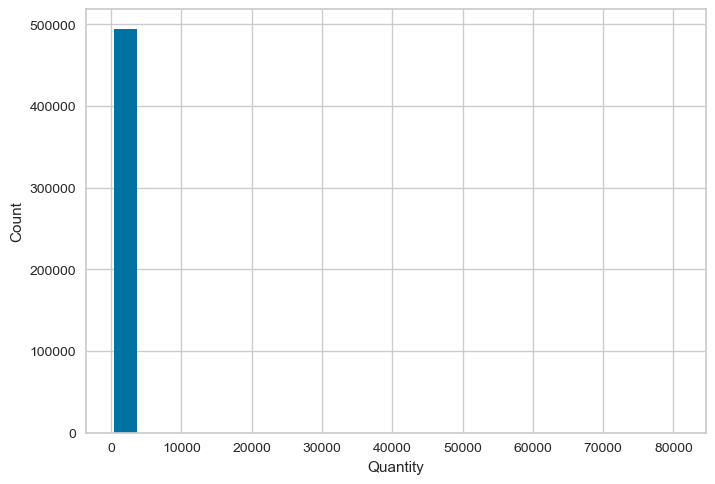

In [73]:
plt.hist(data_clean2['Quantity'], bins=20, rwidth=0.8)
plt.xlabel('Quantity')
plt.ylabel('Count')

In [74]:
# z = np.abs(stats.zscore(data_clean['Quantity']))
# print(z)

#### z-score Define outlier threshold value
- generally 3.0. As 99.7% of the data points lie between +/- 3 standard deviation (using Gaussian Distribution approach)

In [75]:
# threshold = 3
# # Position of the outlier
# print(np.where(z > 3))
# # Outlier’s Index

#### zscore Code:  automatically detects  and exclude outliers - pandas code:
https://stackoverflow.com/questions/23199796/detect-and-exclude-outliers-in-a-pandas-dataframe

In [76]:
#just reviewing not changing here. 
#import numpy as np
#from scipy import stats
#df[(np.abs(stats.zscore(df)) < 3).all(axis=1)]

In [77]:
#specify a column for the zscore, df[0] for example, and remove .all(axis=1)
#df[(np.abs(stats.zscore(df[0])) < 3)]